<a href="https://colab.research.google.com/github/Fatima522000/Loan_Amount-Predicition/blob/main/Loan_dataset_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction Problem From Scratch to End

This article was published as a part of the Data Science Blogathon.

---

## Introduction to Loan Prediction Problem

Welcome to this article on the Loan Prediction Problem. Below is a brief introduction to this topic to acquaint you with what you will be learning.

### **Objective of the Article**

This article is designed for people who want to solve binary classification problems using Python. By the end of this article, you will have the necessary skills and techniques required to solve such problems. This article provides sufficient theory and practice knowledge to hone your skills.

### **Expectations from the Article**

1. **Introduction to the Problem**
2. **Exploratory Data Analysis (EDA) and Pre-Processing**
3. **Model Building and Feature Engineering**

These sections are supplemented with theory and coding examples. Additionally, you will be provided with dataset resources.

---

## Problem Statement

Understanding the problem statement is the first and foremost step. This will help give you an intuition of what you will face ahead of time. Let us see the problem statement.

Dream Housing Finance Company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customers first apply for a home loan, after which the company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer details provided while filling out the online application form. These details include:

- Gender
- Marital Status
- Education
- Number of Dependents
- Income
- Loan Amount
- Credit History
- And other factors

To automate this process, they have given a problem to identify the customer segments eligible for loan amounts so that they can specifically target these customers.

It is a **classification problem** where we have to predict whether a loan would be approved or not. In these kinds of problems, we predict discrete values based on a given set of independent variables.

### **Types of Classification**

- **Binary Classification**: Predict one of two given classes. For example:
  - Classifying gender as male or female.
  - Predicting the result as win or loss.

- **Multi-Class Classification**: Classify the data into three or more classes. For example:
  - Classifying a movie’s genre as comedy, action, or romantic.
  - Classifying fruits like oranges, apples, pears, etc.

Loan prediction is a common real-life problem that each retail bank faces at least once in its lifetime. If done correctly, it can save a lot of man-hours for a retail bank.

Although this course is specifically built to guide you through the Loan Prediction problem, you can always refer to the content to get a comprehensive overview of solving classification problems.

---

## Hypothesis Generation

After looking at the problem statement, we will now move into hypothesis generation. This is the process of listing all the possible factors that can affect the outcome.

### **What is Hypothesis Generation?**

This is a crucial stage in a data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming maximum possibilities that can impact the outcome. It is done by thoroughly understanding the problem statement before looking at the data.

### **Factors Affecting Loan Approval**

Below are some of the factors that can affect loan approval (dependent variable for this loan prediction problem):

- **Salary**: Applicants with high income should have more chances of getting approval.
- **Previous History**: Applicants who have paid their historical debts have more chances of getting approval.
- **Loan Amount**: The lesser the amount, the higher the chances of getting approval.
- **Loan Term**: The shorter the time period, the higher the chances of approval.
- **EMI**: The lesser the monthly payable amount, the higher the chances of getting approval.

These are some of the factors that can affect the target variable. You can identify many more factors by exploring the dataset.

---

## Getting the System Ready and Loading the Data

We will be using Python for this problem along with the below-listed libraries. The versions of these libraries are mentioned:

### **Specifications**

- Python = 3.7
- pandas = 0.20.3
- seaborn = 1.0.0
- scikit-learn = 0.19.1


### Import the Pandas library and read the Loan dataset (Loan.csv) into a DataFrame named loan_df.

In [ ]:
import pandas as pd
import numpy as np
import warnings


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#pip list To see all versions of the libraries in Python.

In [ ]:
df=pd.read_csv('loan_CSV.csv')

In [ ]:
df_copy=df.copy()

In [ ]:
#type
type(df)

pandas.core.frame.DataFrame

###  Display the first five rows of the dataset.



In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### How many rows and columns are in the dataset?


In [ ]:
df.info() #way_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Loan_Amount_Term      float64
#Credit_History        float64

#convert them to object type

# Object
# Nominal data: No specific order, like car colors.
# Ordinal data: Has a specific order, like ranking or level (discrete).
# Binary data : Accepts only two values (e.g., male, female); similar to nominal (discrete).



In [ ]:
#To convert from float to int to string in the same step while keeping NaN values.
df['Credit_History']=pd.to_numeric(df['Credit_History'],errors='coerce').round(0).astype('Int64').astype('string')

"""Here, we are adding the round(0) function to avoid the error that
occurs when converting from float64 to int64
because we need to round the float numbers before converting them."""

#This code we can't use it if we have a mix data type

'Here, we are adding the round(0) function to avoid the error that\noccurs when converting from float64 to int64\nbecause we need to round the float numbers before converting them.'

In [ ]:
#convert the Loan_Amount_Term from mnthes to years
df.rename(columns={'Loan_Amount_Term':'Loan_Amount_Year'},inplace=True)
df['Loan_Amount_Year']=df['Loan_Amount_Year']/12

df['Loan_Amount_Year']=pd.to_numeric(df['Loan_Amount_Year'],errors='coerce').round(0).astype('Int64').astype('string')

In [ ]:
#using python replace all the values in 'Education'
#'Graduate' change to 'G'
#'Not Graduate' change to 'NG'

len_1=len(df['Education'])
for i in range(len_1):
  if df['Education'][i]=='Graduate':
      df['Education'][i]='G'
  elif  df['Education'][i]=='Not Graduate':
         df['Education'][i]='NG'

In [ ]:
# using pandas to  replace all values in 'Gender'
#'Male change to M'
#'Female change to F'
# in this case we are using map function

cat_map={'Male':'M','Female':'F'}
df['Gender']=df_copy['Gender'].map(cat_map)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Year,Credit_History,Property_Area,Loan_Status
0,LP001002,M,No,0,G,No,5849,0.0,NaN,30,1,Urban,Y
1,LP001003,M,Yes,1,G,No,4583,1508.0,128.0,30,1,Rural,N
2,LP001005,M,Yes,0,G,Yes,3000,0.0,66.0,30,1,Urban,Y
3,LP001006,M,Yes,0,NG,No,2583,2358.0,120.0,30,1,Urban,Y
4,LP001008,M,No,0,G,No,6000,0.0,141.0,30,1,Urban,Y


In [ ]:
#rename the coulumn name
# we will rename  two columns (ApplicantIncome	, CoapplicantIncome) ti (AI,CAI)
df.rename(columns={'ApplicantIncome':'AI','CoapplicantIncome':'CAI'},inplace=True)

In [ ]:
#Drop the column we use the drop function there is anothe atrupete function is inplace=True to update the data
df.drop(columns=['Loan_ID'],inplace=True)

### Count the total number of missing values in the dataset.


In [ ]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
AI,0
CAI,0
LoanAmount,22
Loan_Amount_Year,14
Credit_History,50


In [ ]:
# Duplicate
"""If you are training a customer classification model and the same customer appears ten times,
the model may overestimate their importance,leading to inaccurate results.
This issue can also occur with certain features.
While duplication in analysis may not always be removed,
it can be addressed in machine learning to improve accuracy"""

'If you are training a customer classification model and the same customer appears ten times,\nthe model may overestimate their importance,leading to inaccurate results.\nThis issue can also occur with certain features.\nWhile duplication in analysis may not always be removed,\nit can be addressed in machine learning to improve accuracy'

In [ ]:
df.duplicated().sum()# the data is clean

np.int64(0)

In [ ]:
df.columns  #to now the columns name


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'AI',
       'CAI', 'LoanAmount', 'Loan_Amount_Year', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

### What is the average loan amount?

In [ ]:
df['LoanAmount'].mean()

np.float64(146.41216216216216)

In [ ]:
#median
df['LoanAmount'].median()

128.0

###  What are the highest and lowest loan amounts?



In [ ]:
LoanAmount_max=df['LoanAmount'].max()
LoanAmount_min=df['LoanAmount'].min()
print('max:',LoanAmount_max,'min :',LoanAmount_min)
#The minimum loan amount is unrealistic.

max: 700.0 min : 9.0


In [ ]:
df[df['LoanAmount']==700]['Loan_Status']

,Loan_Status
171,Y


In [ ]:
df[df['LoanAmount']==9]['Loan_Status']

,Loan_Status
568,N


In [ ]:
#The highest loan amount was approved, while the lowest was rejected

In [ ]:
df[df['LoanAmount']==700]

,Gender,Married,Dependents,Education,Self_Employed,AI,CAI,LoanAmount,Loan_Amount_Year,Credit_History,Property_Area,Loan_Status
171,NaN,Yes,3+,G,No,51763,0.0,700.0,25,1,Urban,Y


In [ ]:
df['AI'].mean()
 #The applicant with the highest loan amount has a salary close to the average income.

np.float64(5403.459283387622)

In [ ]:
df[df['LoanAmount']>=146]['LoanAmount']

,LoanAmount
5,267.0
7,158.0
8,168.0
9,349.0
12,200.0
...,...
604,496.0
606,173.0
607,157.0
611,253.0


In [ ]:
#211 loan amounts are greater than the  LoanAmount mean.

In [ ]:
df[df['LoanAmount']>=146]['Loan_Status'].value_counts()


,count
Loan_Status,
Y,137
N,74


In [ ]:
#It is likely that the higher the loan amount, the higher the chance of approval.

### How many loans were approved (Loan_Status = 'Y') and how many were rejected (Loan_Status = 'N')?

In [ ]:
#to the columns that have category we use th count not max or min
df['Loan_Status'].value_counts()


,count
Loan_Status,
Y,422
N,192


In [ ]:
#the data size=614 and the loa_ststus_Yes=422
#Most were approved, meaning easy approval or qualified applicants
#loan_ststus_No=192
#Exploring the rejection reasons

In [ ]:
df.describe() # it is just for the columns have numeracy data

,AI,CAI,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [ ]:
df[df['AI']==81000.000000]['Loan_Status']
#The highest salary was not approved for a loan.


,Loan_Status
409,N


In [ ]:
df[df['AI']==81000]

,Gender,Married,Dependents,Education,Self_Employed,AI,CAI,LoanAmount,Loan_Amount_Year,Credit_History,Property_Area,Loan_Status
409,M,Yes,3+,G,No,81000,0.0,360.0,30,0,Rural,N


In [ ]:
#Ensure that the reason for rejection is Rural and that the bank is biased in granting loans.

### How many loans were applied for in each property area (Urban, Rural, Semiurban)?

In [ ]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [ ]:
df[df['Property_Area']=='Rural']['Loan_Status'].value_counts()

,count
Loan_Status,
Y,110
N,69


In [ ]:
#Rural=179
#Loan_Status_Yes=110
#The approval rate for Rural applicants is higher than the rejection rate.

In [ ]:
df['Gender'].value_counts()
#The number of male loan applicants is higher than the number of female applicants.

,count
Gender,
M,489
F,112


In [ ]:
df[(df['Gender']=='M') & (df['Loan_Status']=='Y')].shape[0]

339

In [ ]:
df[(df['Gender']=='M') & (df['Dependents'] != '0') & (df['Loan_Status']=='Y')].shape[0]

159

In [ ]:
df[(df['Gender']=='M') & (df['Dependents'] == '0') & (df['Loan_Status']=='Y')].shape[0]

180

In [ ]:
#Male applicants have a similar approval rate, regardless of dependency status

In [ ]:
df[(df['Gender']=='F') & (df['Loan_Status']=='Y')].shape[0]

75

In [ ]:
df[(df['Gender']=='F') & (df['Dependents'] != '0') & (df['Loan_Status']=='Y')].shape[0]

21

In [ ]:
df[(df['Gender']=='F') & (df['Dependents'] == '0') & (df['Loan_Status']=='Y')].shape[0]

54

In [ ]:
"""The loan approval rate for males is approximately 69.3%,
which is very close to the 67% approval rate for females,
indicating no significant gender bias in loan approvals."""

'The loan approval rate for males is approximately 69.3%,\nwhich is very close to the 67% approval rate for females,\nindicating no significant gender bias in loan approvals.'

In [ ]:
#The bank seems to favor non-dependent females over dependent females.


In [ ]:
df[(df['Gender']=='M') & (df['Loan_Status']=='Y')]['AI'].mean()

np.float64(5263.814159292036)

In [ ]:
df[(df['Gender']=='M') & (df['Loan_Status']=='N')]['AI'].mean()

np.float64(5859.24)

In [ ]:
#Approved male applicants have a lower average income than those who were not approved.

In [ ]:
df[(df['Gender']=='F') & (df['Loan_Status']=='Y')]['AI'].mean()

np.float64(4915.8533333333335)

In [ ]:
df[(df['Gender']=='F') & (df['Loan_Status']=='N')]['AI'].mean()

np.float64(4091.3513513513512)

In [ ]:
df[(df['Gender']=='F')& (df['Dependents'] != '0') & (df['AI']>=4915) ]

,Gender,Married,Dependents,Education,Self_Employed,AI,CAI,LoanAmount,Loan_Amount_Year,Credit_History,Property_Area,Loan_Status
54,F,Yes,1,G,Yes,11500,0.0,286.0,30,0,Urban,N
113,F,No,1,G,Yes,7451,0.0,NaN,30,1,Semiurban,Y
146,F,Yes,2,G,No,14866,0.0,70.0,30,1,Urban,Y
293,F,No,NaN,G,No,5417,0.0,143.0,40,0,Urban,N
430,F,No,1,G,Yes,8624,0.0,150.0,30,1,Semiurban,Y
435,F,NaN,NaN,G,No,10047,0.0,NaN,20,1,Semiurban,Y
463,F,No,1,NG,NaN,5191,0.0,132.0,30,1,Semiurban,Y
509,F,No,1,G,No,13262,0.0,40.0,30,1,Urban,Y
561,F,Yes,1,G,Yes,19484,0.0,600.0,30,1,Semiurban,Y
604,F,Yes,1,G,No,12000,0.0,496.0,30,1,Semiurban,Y


In [ ]:
#show the unique
df['LoanAmount'].nunique()

203

In [ ]:
df['Education'].value_counts()

,count
Education,
G,480
NG,134


In [ ]:
per_graduate=(480/614)*100
per_Notgraduate=(134/614)*100
print('\n',per_graduate,'\n', per_Notgraduate)


 78.17589576547232 
 21.824104234527688


In [ ]:
"""The percentage(78%) of individuals who completed their education and applied
 for a loan is higher than the percentage(21%) of those who did not complete their education and applied for a loan"""

'The percentage(78%) of individuals who completed their education and applied\n for a loan is higher than the percentage(21%) of those who did not complete their education and applied for a loan'

In [ ]:
df[(df['Education']=='NG') & (df['Loan_Status']=='Y')].shape[0]

82

In [ ]:
(82/134)*100

61.19402985074627

In [ ]:
df[(df['Education']=='NG') & (df['Loan_Status']=='N')].shape[0]

52

In [ ]:
(52/134)*100

38.80597014925373

In [ ]:
"""The percentage(61%) of non-educated individuals (NG) who were approved for a loan is higher
 than the percentage(38%) of non-educated individuals who were denied a loan."""

'The percentage(61%) of non-educated individuals (NG) who were approved for a loan is higher\n than the percentage(38%) of non-educated individuals who were denied a loan.'

In [ ]:
df[(df['Education']=='G') & (df['Loan_Status']=='Y')].shape[0]

340

In [ ]:
(340/480)*100

70.83333333333334

In [ ]:
"""The percentage(70%) of educated individuals (G) who were approved for a loan is higher
than the percentage(30%) of educated individuals who were denied a loan"""

'The percentage(70%) of educated individuals (G) who were approved for a loan is higher\nthan the percentage(30%) of educated individuals who were denied a loan'

# Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

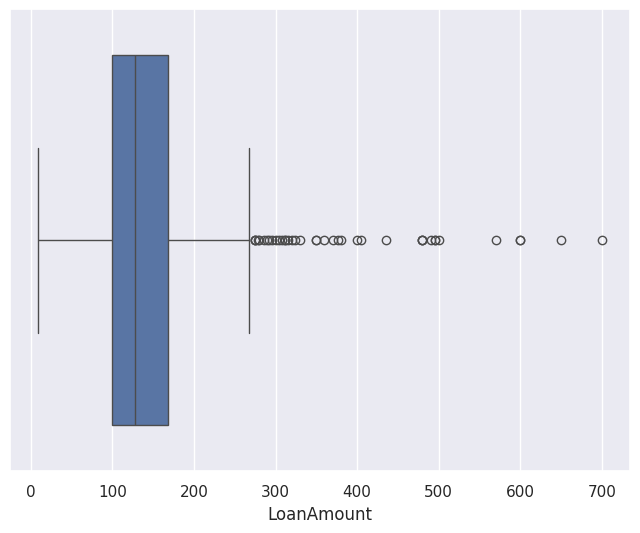

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['LoanAmount'])
plt.show()

In [ ]:
df[df['LoanAmount']>=280].shape[0]
#There are 35 outliers in the loan amounts distribution

35

The outliers in the LoanAmount column are more common among those who were approved or not

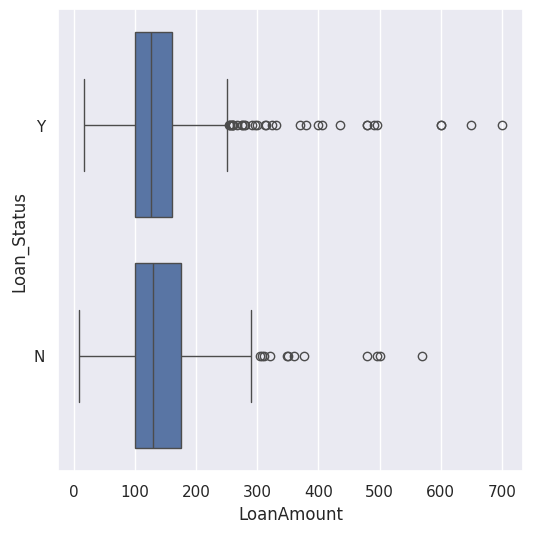

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['LoanAmount'],y=df['Loan_Status'])
plt.show()

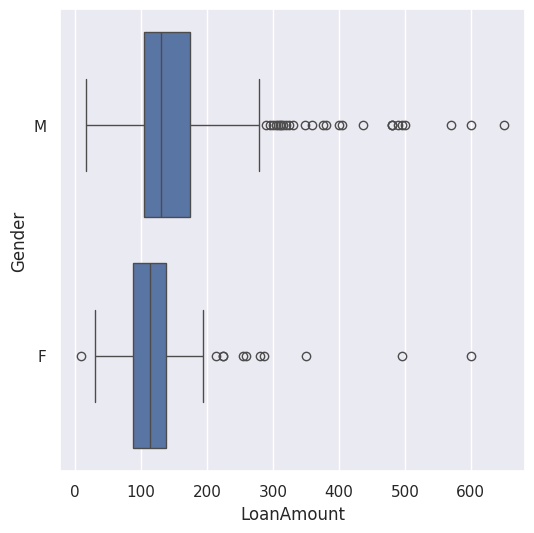

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['LoanAmount'],y=df['Gender'])
plt.show()

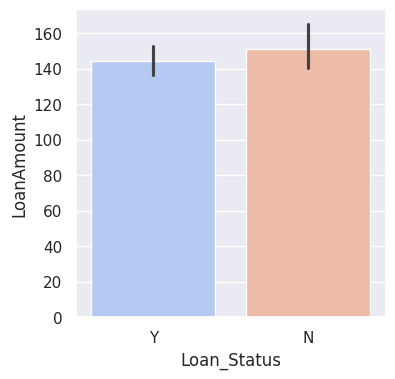

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x=df['Loan_Status'],y=df['LoanAmount'],palette='coolwarm')
plt.show()

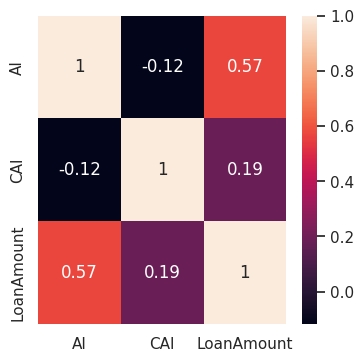

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


<Axes: xlabel='LoanAmount', ylabel='Count'>

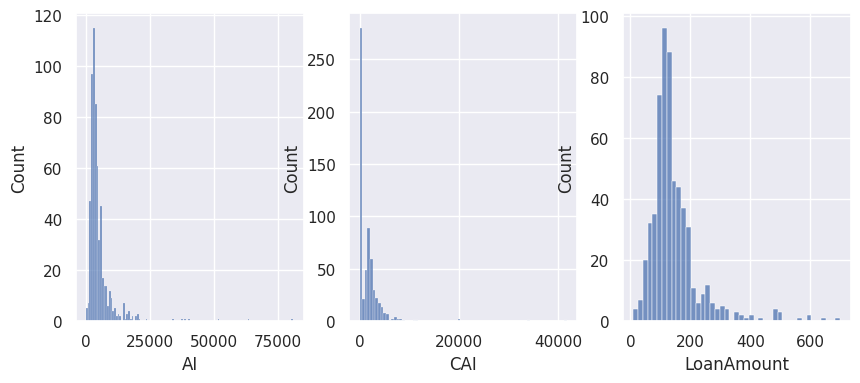

In [ ]:
#distribution : usind to numeric data
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df['AI'],ax=axs[0])
sns.histplot(df['CAI'],ax=axs[1])
sns.histplot(df['LoanAmount'],ax=axs[2])


In [ ]:
df.describe()

,AI,CAI,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


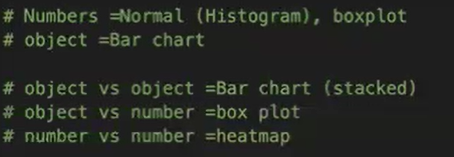

#Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df=pd.read_csv('loan_CSV.csv')

In [ ]:
#Missing Value
#Missing Value for categorical ["Gender","Married","Dependents" ,"Self_Employed","Credit_History","Loan_Amount_Term"]
#Missing Value for numeric ["LoanAmount"]

In [ ]:
categorical_columns=["Gender","Married","Dependents" ,"Self_Employed","Credit_History","Loan_Amount_Term"]
cat=SimpleImputer(strategy='most_frequent')


df[categorical_columns]=cat.fit_transform(df[categorical_columns])

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,0


In [ ]:
#If the data is normal (without outliers), use the mean.
#If the data has many outliers, use the median because it is less affected by extreme values.
#Interpolation is used when missing values are between known values, not at the beginning or end.
#Interpolation is usually more accurate when there is a clear pattern in the data.
#KNN Imputation uses nearby values to fill missing data and is suitable for non-sequential data, especially when outliers are present.

In [ ]:
numeric_columns=['LoanAmount']
num=SimpleImputer(strategy='median')
df[numeric_columns]=num.fit_transform(df[numeric_columns])

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
df.drop(index=1,inplace=True)
df.reset_index(drop=True,inplace=True) #Hide this line to test the model after training.

In [ ]:
df.shape

(613, 12)

image.png

#Encoder

In [ ]:
#One-Hot Encoding:Converts each category into separate binary columns(0 or 1).It is best suited for a small number of categories but can significantly increase dimensionality when dealing with many categories. This method removes any inherent relationship between the categories within a column
#Ordinal Encoding:Assigns numerical values to categories in a specific order(e.g.,Low=1,Medium=2,High=3).It is suitable for Decision Trees and Random Forests,but may not be ideal for Logistic Regression as it can mislead models by implying a numerical relationship between categories
#Label Encoding:Replaces categories with numerical values.Works well with Tree-Based Models but can create issues in linear models due to unintended numerical relationships.
#Target Encoding:Replaces categories with the mean of the target variable for that category. Useful for high-cardinality features but may cause Overfitting if not handled properly.(using with complex dataset)
#Frequency Encoding:Replaces categories with their frequency in the dataset.Useful for handling high-cardinality features but does not capture relationships between categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encod=LabelEncoder()
encoder=OneHotEncoder(sparse_output=False,drop='first') #By default,OneHotEncoder arranges categories in alphabetical order
#Using drop='first'with OneHotEncoder removes the first encoded column to reduce dimensionality and avoid the Dummy Variable Trap

In [ ]:
df['Loan_Amount_Term']=(df['Loan_Amount_Term'].astype(float)/12).astype(int)

In [ ]:
label_encoder_list=["Gender","Married","Self_Employed","Credit_History","Loan_Status",'Education']
for i in label_encoder_list:

  df[i]=encod.fit_transform(df[i])
  mapping=dict(zip(encod.classes_,encod.transform(encod.classes_)))
  print(mapping)

{'Female': np.int64(0), 'Male': np.int64(1)}
{'No': np.int64(0), 'Yes': np.int64(1)}
{'No': np.int64(0), 'Yes': np.int64(1)}
{0.0: np.int64(0), 1.0: np.int64(1)}
{'N': np.int64(0), 'Y': np.int64(1)}
{'Graduate': np.int64(0), 'Not Graduate': np.int64(1)}


In [ ]:
Hot_encoder_list=["Dependents","Property_Area"]
encoded_data=encoder.fit_transform(df[Hot_encoder_list])
encoded_columns=encoder.get_feature_names_out(Hot_encoder_list)
df.drop(columns=Hot_encoder_list,inplace=True)
df=df.join(pd.DataFrame(encoded_data,columns=encoded_columns))


In [ ]:
encoded_columns

array(['Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

#Transformation

In [ ]:
df_copy=df.copy()
df_copy_2=df.copy()
df_3=df.copy()

In [ ]:
"""Use np.log1p() for safe logarithmic transformation,especially if the data contains zero values,
but it does not work with negative values and results in NaN,
so they should be handled beforehand"""
np.log1p(80000)


np.float64(11.289794413577894)

In [ ]:
df_copy.ApplicantIncome=np.log1p(df_copy.ApplicantIncome)
df_copy.CoapplicantIncome=np.log1p(df_copy.CoapplicantIncome)
df_copy.LoanAmount=np.log1p(df_copy.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

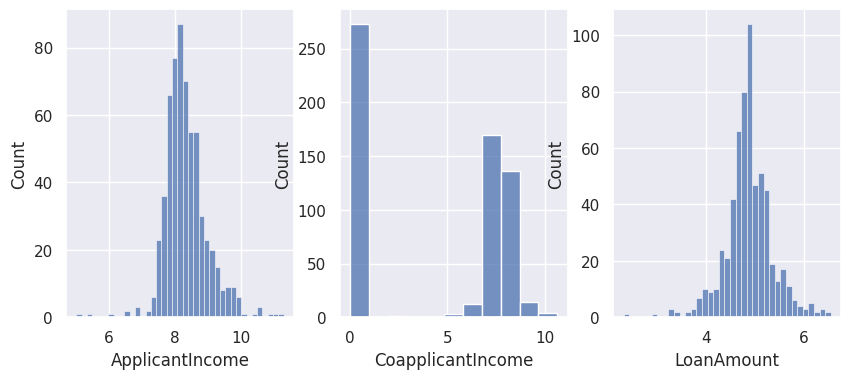

In [ ]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df_copy['ApplicantIncome'],ax=axs[0])
sns.histplot(df_copy['CoapplicantIncome'],ax=axs[1])
sns.histplot(df_copy['LoanAmount'],ax=axs[2])

In [ ]:
"""The Square Root Transformation is used to reduce right-skewness in data while preserving zero values.
It is useful for stabilizing variance but does not work with negative values,
as the square root of a negative number is undefined in real numbers.
Use np.sqrt(data) to apply this transformation, but make sure all values are non-negative before applying it"""
np.sqrt(80000)

np.float64(282.842712474619)

In [ ]:
df_copy_2.ApplicantIncome=np.sqrt(df_copy_2.ApplicantIncome)
df_copy_2.CoapplicantIncome=np.sqrt(df_copy_2.CoapplicantIncome)
df_copy_2.LoanAmount=np.sqrt(df_copy_2.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

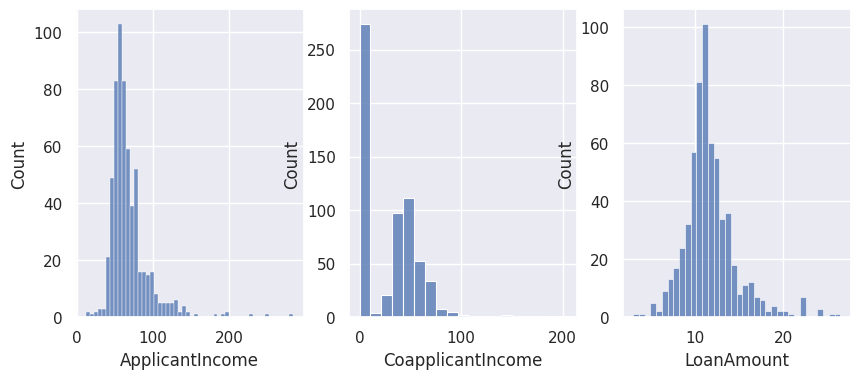

In [ ]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df_copy_2['ApplicantIncome'],ax=axs[0])
sns.histplot(df_copy_2['CoapplicantIncome'],ax=axs[1])
sns.histplot(df_copy_2['LoanAmount'],ax=axs[2])

In [ ]:
"""Apply square root transformation to CoapplicantIncome,
and apply log transformation to ApplicantIncome and LoanAmount"""

'Apply square root transformation to CoapplicantIncome,\nand apply log transformation to ApplicantIncome and LoanAmount'

In [ ]:
df.CoapplicantIncome=np.sqrt(df.CoapplicantIncome)
df.ApplicantIncome=np.log1p(df.ApplicantIncome)
df.LoanAmount=np.log1p(df.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

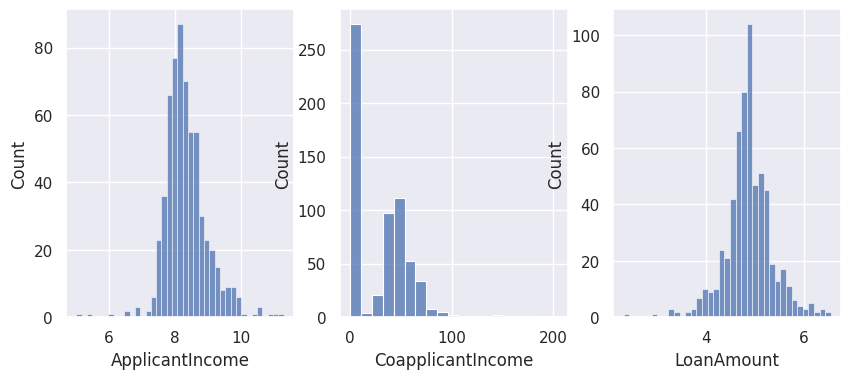

In [ ]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df['ApplicantIncome'],ax=axs[0])
sns.histplot(df['CoapplicantIncome'],ax=axs[1])
sns.histplot(df['LoanAmount'],ax=axs[2])

#Scaling

In [ ]:
#MinMaxScaler:Scales values between 0 and 1,preserving the original distribution but sensitive to outliers.
#StandardScaler:Transforms values so that the mean=0 and standard deviation=1,suitable for normally distributed data.
#RobustScaler:Uses the median and interquartile range(IQR),making it more resistant to outliers compared to other methods

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler

In [ ]:
df_copy_1=df.copy()
df_copy_2=df.copy()
df_copy_3=df.copy()

In [ ]:
scaler_1=MinMaxScaler()
scale_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']
df_copy_1[scale_columns]=scaler_1.fit_transform(df_copy_1[scale_columns])

<Axes: xlabel='LoanAmount', ylabel='Count'>

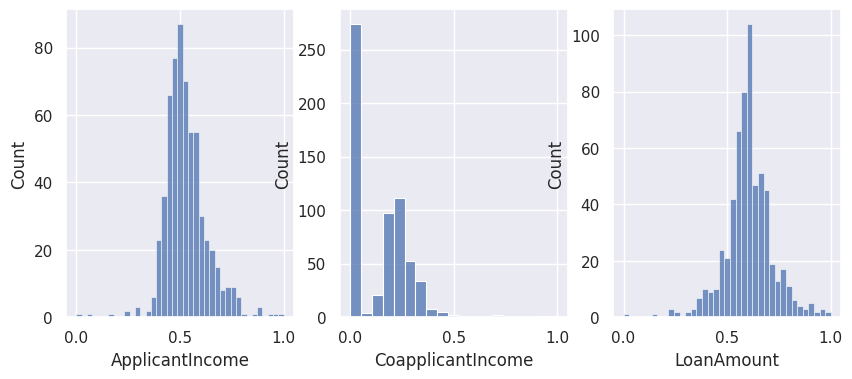

In [ ]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df_copy_1['ApplicantIncome'],ax=axs[0])
sns.histplot(df_copy_1['CoapplicantIncome'],ax=axs[1])
sns.histplot(df_copy_1['LoanAmount'],ax=axs[2])

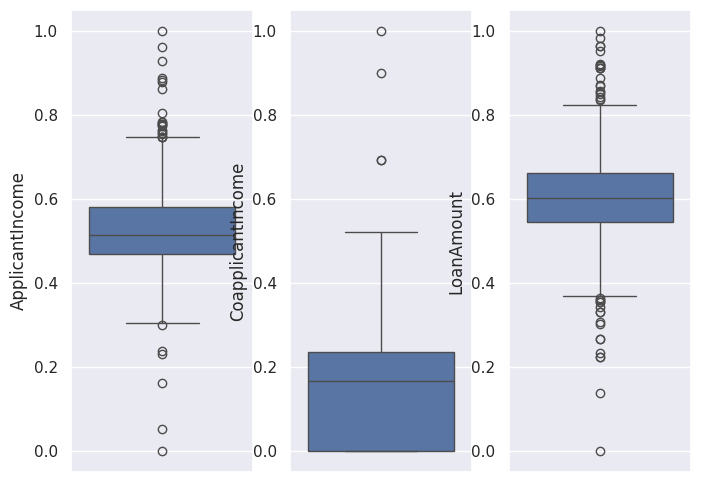

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
sns.boxplot(y=df_copy_1['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(y=df_copy_1['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(y=df_copy_1['LoanAmount'])
plt.show()

In [ ]:
scaler_2=StandardScaler()
scale_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']
df_copy_2[scale_columns]=scaler_1.fit_transform(df_copy_2[scale_columns])

<Axes: xlabel='LoanAmount', ylabel='Count'>

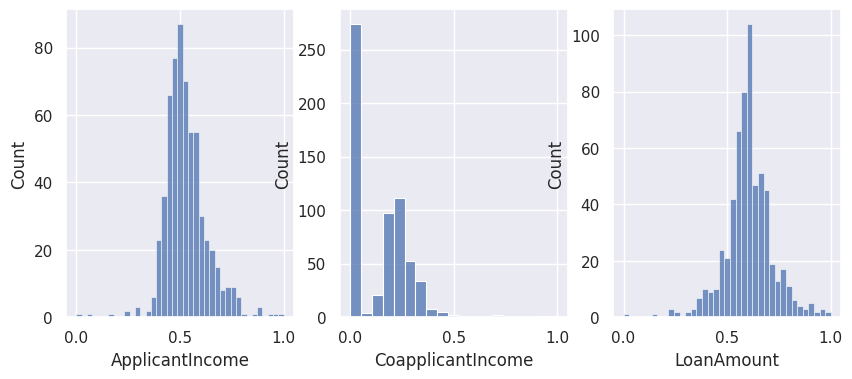

In [ ]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df_copy_2['ApplicantIncome'],ax=axs[0])
sns.histplot(df_copy_2['CoapplicantIncome'],ax=axs[1])
sns.histplot(df_copy_2['LoanAmount'],ax=axs[2])

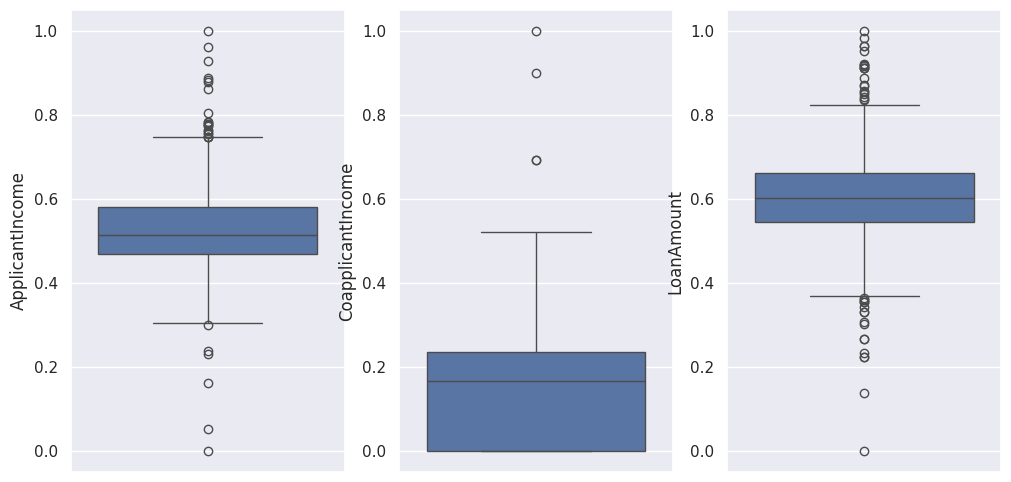

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(y=df_copy_2['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(y=df_copy_2['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(y=df_copy_2['LoanAmount'])
plt.show()

In [ ]:
scaler_3=RobustScaler()
scale_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']
df_copy_3[scale_columns]=scaler_3.fit_transform(df_copy_3[scale_columns])

<Axes: xlabel='LoanAmount', ylabel='Count'>

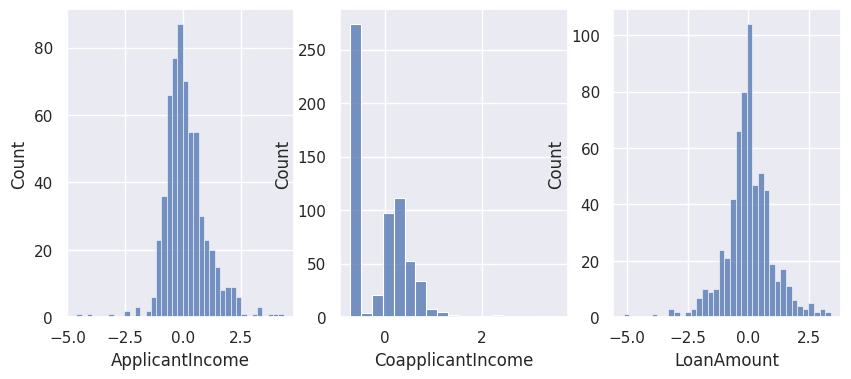

In [ ]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(1,3,figsize=(10,4))
sns.histplot(df_copy_3['ApplicantIncome'],ax=axs[0])
sns.histplot(df_copy_3['CoapplicantIncome'],ax=axs[1])
sns.histplot(df_copy_3['LoanAmount'],ax=axs[2])

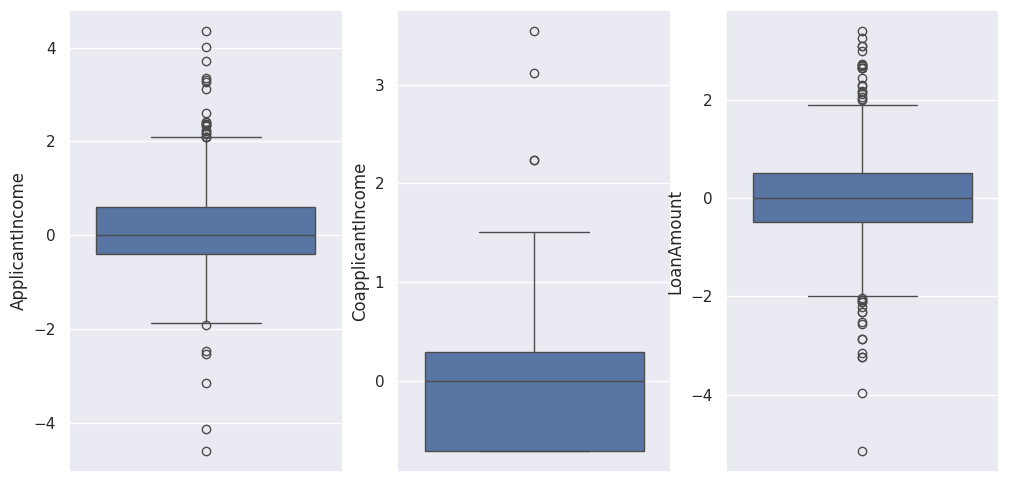

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(y=df_copy_3['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(y=df_copy_3['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(y=df_copy_3['LoanAmount'])
plt.show()

In [ ]:
scaler=MinMaxScaler()
df[scale_columns]=scaler.fit_transform(df[scale_columns])

#Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(columns=['Loan_Status']).values
y=df['Loan_Status'].values

In [ ]:
#oversapliang  SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Loan_Status,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0) #42,1,1600

#Models and Evaluate

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
def plot_confusion_matrix(y_test,y_pred):
 cm=confusion_matrix(y_test,y_pred)
 plt.figure(figsize=(6,4))
 sns.heatmap(cm, annot=True,xticklabels=["Pred 0","Pred 1"], yticklabels=["Actual 0","Actual 1"])
 plt.show()

In [ ]:
#The logistic model
from sklearn.linear_model import LogisticRegression

In [ ]:
"""The logistic model is primarily used for binary classification,
and its extended version, ordinal logistic regression,
is used for ordinal data classification"""

'The logistic model is primarily used for binary classification,\nand its extended version, ordinal logistic regression,\nis used for ordinal data classification'

In [ ]:
Alg_1=LogisticRegression()
Alg_1.fit(x_train, y_train)
y_pred=Alg_1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6982248520710059

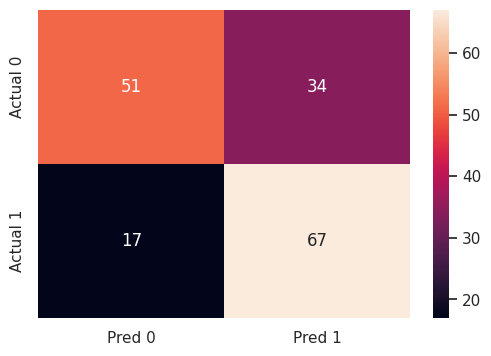

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        85
           1       0.66      0.80      0.72        84

    accuracy                           0.70       169
   macro avg       0.71      0.70      0.70       169
weighted avg       0.71      0.70      0.70       169



In [ ]:
#A Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
"""A Decision Tree operates based on the principle of entropy and information gain.
It does not require scaling, making it flexible with both large and small values.
It also performs well in the presence of outliers. Additionally,
it can make predictions for both classification and numerical values (regression).
However, it requires a large dataset to build an accurate and reliable model"""

'A Decision Tree operates based on the principle of entropy and information gain.\nIt does not require scaling, making it flexible with both large and small values.\nIt also performs well in the presence of outliers. Additionally,\nit can make predictions for both classification and numerical values (regression).\nHowever, it requires a large dataset to build an accurate and reliable model'

In [ ]:
Alg_2=DecisionTreeClassifier()
Alg_2.fit(x_train, y_train )
y_pred=Alg_2.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.7514792899408284

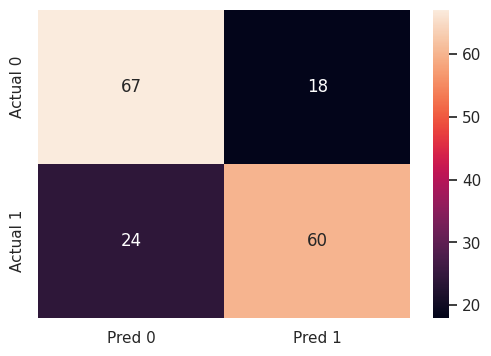

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        85
           1       0.77      0.71      0.74        84

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
Alg_3=RandomForestClassifier()
Alg_3.fit(x_train ,y_train)
y_pred=Alg_3.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.8284023668639053

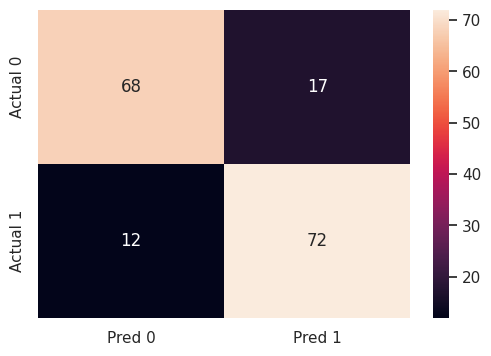

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        85
           1       0.81      0.86      0.83        84

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169



In [ ]:
#SVM
from sklearn.svm import SVC
Alg_4=SVC(kernel='linear',C=0.1,gamma=0.01) #C={'sigmoid','poly','rbf','precomputed','linear'}
Alg_4.fit(x_train, y_train )
y_pred=Alg_4.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.7337278106508875

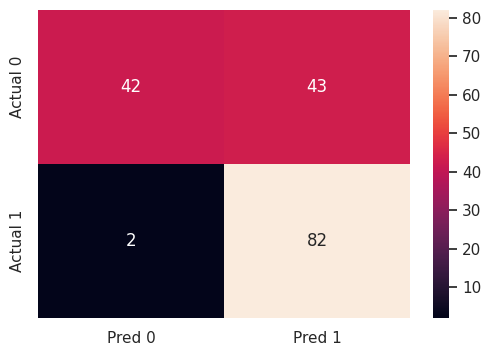

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.49      0.65        85
           1       0.66      0.98      0.78        84

    accuracy                           0.73       169
   macro avg       0.81      0.74      0.72       169
weighted avg       0.81      0.73      0.72       169



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
Alg_5=KNeighborsClassifier(n_neighbors=5)
Alg_5.fit(x_train,y_train)
y_pred=Alg_5.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7396449704142012

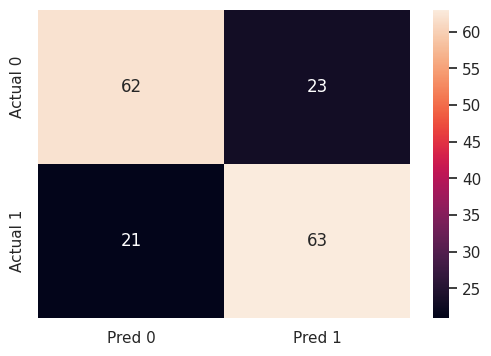

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        85
           1       0.73      0.75      0.74        84

    accuracy                           0.74       169
   macro avg       0.74      0.74      0.74       169
weighted avg       0.74      0.74      0.74       169



In [ ]:
from xgboost import XGBClassifier

Alg_6=XGBClassifier()
Alg_6.fit(x_train, y_train)
y_pred=Alg_6.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.8284023668639053

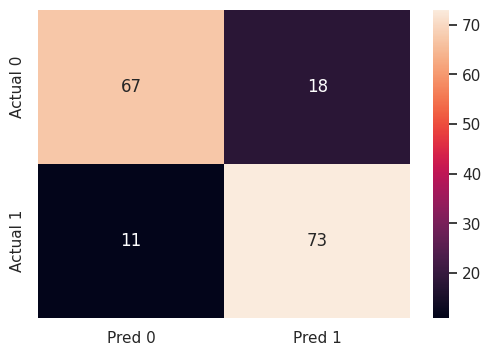

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        85
           1       0.80      0.87      0.83        84

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169



#Testing



In [ ]:
#predict new value
new_value=[1,1,0,0,4583,1508,128,30,1,1,0,0,0,0]
new_value=np.array(new_value).reshape(1,-1)


لقطة شاشة 2025-03-23 161424.png

In [ ]:
{'Female': np.int64(0), 'Male': np.int64(1)}
{'No': np.int64(0), 'Yes': np.int64(1)}
{'No': np.int64(0), 'Yes': np.int64(1)}
{"0": np.int64(0), "1": np.int64(1)}
{'Graduate': np.int64(0), 'Not Graduate': np.int64(1)}

{'Graduate': np.int64(0), 'Not Graduate': np.int64(1)}

In [ ]:
##The logistic model
Alg_1.predict(new_value)

array([1])

In [ ]:
#A Decision Tree
Alg_2.predict(new_value)

array([0])

In [ ]:
#Random Forest
Alg_3.predict(new_value)

array([0])

In [ ]:
#SVM
Alg_4.predict(new_value)

array([1])

In [ ]:
#KNN
Alg_5.predict(new_value)

array([1])

In [ ]:
#XGB
Alg_6.predict(new_value)